# Assignment A  (assigned city)

In [1]:
#preliminaries
import pandas as pd
import numpy as np

%matplotlib inline
import random
import matplotlib.pyplot as plt

from pandasql import PandaSQL
pdsql = PandaSQL()

## A1:Identify all GP practices and produce a table with the total number of prescriptions and their total actual cost (using the ACT COST column)

### identify GP in Leicester

In [2]:
#read csv file of all practices in UK
url='https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv'
cols= ['date','Practice_code','Practice_name','address_1','address_2','address_3','address_4','post_code',' ']
UK_prac = pd.read_csv(url,header=None,names=cols).rename(columns=lambda x: x.strip())

#select city by city name
Leicester_prac=UK_prac[UK_prac['address_3'].str.strip()=='LEICESTER']
Leicester_prac

,date,Practice_code,Practice_name,address_1,address_2,address_3,address_4,post_code,
1023,201512,C82005,GROBY ROAD MEDICAL CENTRE (ID PATCHETT),9 GROBY ROAD,,LEICESTER,LEICESTERSHIRE,LE3 9ED,...
1032,201512,C82015,RUSHEY MEAD HEALTH CENTRE,RUSHEY MEAD HEALTH CENTRE,8 LOCKERBIE WALK,LEICESTER,LEICESTERSHIRE,LE4 7ZX,...
1035,201512,C82018,PARKER DRIVE SURGERY,122 PARKER DRIVE,,LEICESTER,,LE4 0JF,...
1037,201512,C82020,DE MONTFORT SURGERY,DE MONTFORT SURGERY,STUDENT HC 100 MILL LANE,LEICESTER,,LE2 7HX,...
1038,201512,C82021,THE CENTRAL SURGERY,THE CENTRAL SURGERY,BROOKSBY DRIVE OADBY,LEICESTER,LEICESTERSHIRE,LE2 5AA,...
1039,201512,C82022,THE BILLESDON SURGERY,BILLESDON SURGERY,4 MARKET PL BILLESDON,LEICESTER,LEICESTERSHIRE,LE7 9AJ,...
1040,201512,C82023,ST MATTHEWS HEALTH & COMMUNITY CENTRE,PRINCE PHILLIP HOUSE,MALABAR ROAD,LEICESTER,LEICESTERSHIRE,LE1 2NZ,...
1041,201512,C82024,SPINNEY HILL MEDICAL CENTRE,143 ST SAVIOURS ROAD,,LEICESTER,,LE5 3HX,...
1047,201512,C82030,DOWNING DRIVE SURGERY (AJJ BENTLEY),THE SURGERY,155 DOWNING DR EVINGTON,LEICESTER,,LE5 6LP,...
1048,201512,C82031,JOHNSON MEDICAL PRACTICE,56 MELBOURNE STREET,,LEICESTER,LEICESTERSHIRE,LE2 0AS,...


### obtain prescription information in Leicester

In [3]:
# this code takes about 10 min 

#read csv file of all prescription in UK(12.2015)
url='https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv'
UK_presc = pd.read_csv(url,header=0).rename(columns=lambda x: x.strip())
UK_presc.rename(columns={'PRACTICE': 'Practice_code'}, inplace=True)

#connect prescription data with practice data through practice code
Leicester_presc=UK_presc.merge(Leicester_prac,how='inner',left_on='Practice_code', right_on='Practice_code')

### produce table with prescription information per GP in Leicester

In [4]:
# sum prescribed items and actual cost to get total prescription frequency and cost per GP
Lei_presc_GP=Leicester_presc.groupby(['Practice_code','Practice_name']).agg({'ITEMS':'sum','ACT COST':'sum'})
Lei_presc_GP.rename(columns={'ITEMS': 'prescription frequency','ACT COST':'total cost'}, inplace=True)
Lei_presc_GP

,,prescription frequency,total cost
Practice_code,Practice_name,,
C82005,GROBY ROAD MEDICAL CENTRE (ID PATCHETT),14659,107735.06
C82015,RUSHEY MEAD HEALTH CENTRE,4787,36467.88
C82018,PARKER DRIVE SURGERY,34888,208898.39
C82020,DE MONTFORT SURGERY,6772,60677.51
C82021,THE CENTRAL SURGERY,13450,122760.48
C82022,THE BILLESDON SURGERY,13624,101928.06
C82023,ST MATTHEWS HEALTH & COMMUNITY CENTRE,6225,43640.62
C82024,SPINNEY HILL MEDICAL CENTRE,35081,225237.94
C82030,DOWNING DRIVE SURGERY (AJJ BENTLEY),9568,88445.23


## A2:Find the top ten most/least frequently prescribed medications across all practices. What is their total actual cost and how does that compare to the overall actual costs of each practice and of the entire city?

### top 10 most frequently prescribed medications

In [5]:
most_freq=Leicester_presc.groupby(['BNF NAME']).agg({'ITEMS':'sum','ACT COST':'sum'}).sort_values(by=['ITEMS'],ascending=False).head(10).reset_index()
most_freq

,BNF NAME,ITEMS,ACT COST
0,Paracet_Tab 500mg,15072,48389.27
1,Lansoprazole_Cap 15mg (E/C Gran),13834,17248.84
2,Amlodipine_Tab 5mg,13636,13471.93
3,Aspirin Disper_Tab 75mg,13087,11459.56
4,Metformin HCl_Tab 500mg,12683,50666.36
5,Simvastatin_Tab 40mg,10037,11741.40
6,Simvastatin_Tab 20mg,9376,9545.58
7,Bendroflumethiazide_Tab 2.5mg,8427,7940.50
8,Atorvastatin_Tab 20mg,8284,12851.11
9,Amlodipine_Tab 10mg,7907,8309.35


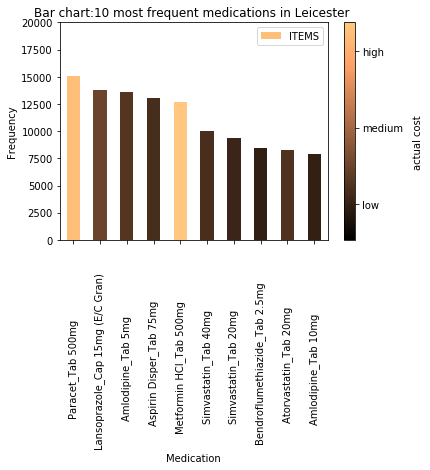

In [6]:
import matplotlib.cm as cm

#use color to represent actual cost
y=most_freq['ACT COST']
colors = cm.copper(y / float(max(y)))

ax1=most_freq [['BNF NAME','ITEMS']].plot(kind='bar', x='BNF NAME', y='ITEMS', title='Bar chart:10 most frequent medications in Leicester ',color=colors,figsize=(6,4),fontsize=10)
ax1.set_xlabel("Medication",fontsize=10)
ax1.set_ylabel("Frequency",fontsize=10)
ax1.set_ylim(0,20000)

bar = plt.scatter(y, y, c = y, cmap = 'copper')
cb=plt.colorbar(bar)
cb.set_ticks([15000,30000,45000])
cb.set_ticklabels(['low','medium','high'])
cb.set_label('actual cost', labelpad=10, y=0.45)


### least 10 most frequently prescribed medications

In [7]:
least_freq=Leicester_presc.groupby(['BNF NAME']).agg({'ITEMS':'sum','ACT COST':'sum'}).sort_values(by=['ITEMS'],ascending=True).head(10).reset_index()
least_freq

,BNF NAME,ITEMS,ACT COST
0,Isotrexin_Gel,1,6.92
1,Cystrin_Tab 5mg,1,6.89
2,Cystine500_Pdr Sach 4g,1,148.09
3,Peptamen_Liq Diet (Vanilla),1,56.14
4,Performa (Reagent)_Strips,1,9.21
5,Cymalon_Gran Sach 4g,1,5.17
6,Cyclopentolate HCl_Eye Dps 1% Ud,1,31.16
7,Pericyazine_Tab 10mg,1,37.87
8,Permitabs_Tab 400mg,1,16.19
9,Cutimed Gel 8g Wound Dress H/Gel Ster,1,1.56


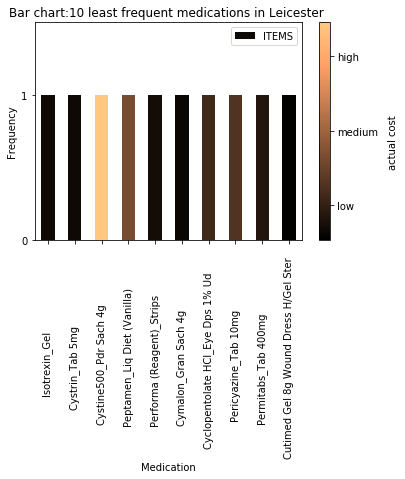

In [8]:
#use color to represent actual cost
y=least_freq['ACT COST']
colors = cm.copper(y / float(max(y)))

ax=least_freq [['BNF NAME','ITEMS']].plot(kind='bar', x='BNF NAME', y='ITEMS', title='Bar chart:10 least frequent medications in Leicester ',color=colors,figsize=(6,4),fontsize=10)
ax.set_xlabel("Medication",fontsize=10)
ax.set_ylabel("Frequency",fontsize=10)
ax.set_ylim(0,1.5)
ax.set_yticks([0,1])

bar = plt.scatter(y, y, c = y, cmap = 'copper')
cb=plt.colorbar(bar)
cb.set_ticks([25,75,125])
cb.set_ticklabels(['low','medium','high'])
cb.set_label('actual cost', labelpad=10, y=0.45)

###  calculate their cost and comparison with total cost of leicester

In [9]:
# calculate total cost of Leicester and average cost of each GP
entire_city=Leicester_presc['ACT COST'].sum()
each_prac=format(entire_city/len(Leicester_prac),'0.2f')

# calculate total cost of ten most/least frequently prescribed medicines
total_most=most_freq['ACT COST'].sum()
total_least=least_freq['ACT COST'].sum()

# calculate the pecentage of ten most/least frequently prescribed medicines' cost in Leicester
percent_most=format(total_most/ entire_city,'0.3%')
percent_least=format(total_least/ entire_city,'0.3%')


# show the result above in  text
print'Total cost of Leicester is', entire_city, '£',', and the average cost of each GP is' ,each_prac, '£'
print'Total cost of 10 most frequntly prescriped medicacines across all practices is',total_most, '£',", occupied" ,percent_most,'of the entire cost of Leceister.'
print'Total cost of 10 least frequntly prescriped medicacines across all practices is',total_least, '£', ", occupied" ,percent_least,'of the entire cost of Leceister.'

Total cost of Leicester is 4919188.88 £ , and the average cost of each GP is 58561.77 £
Total cost of 10 most frequntly prescriped medicacines across all practices is 191623.9 £ , occupied 3.895% of the entire cost of Leceister.
Total cost of 10 least frequntly prescriped medicacines across all practices is 319.2 £ , occupied 0.006% of the entire cost of Leceister.


Text(0.5,1,u'Pie chart:Actual Cost by prescription frequency (Leicester)')

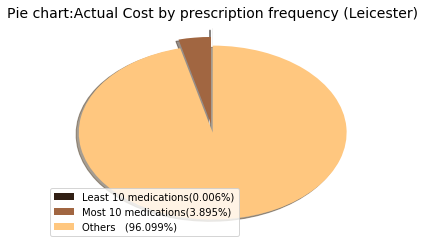

In [10]:
# show the result above in  pie chart
labels = [ 'Least 10 medications(0.006%)','Most 10 medications(3.895%)','Others   (96.099%)']
fracs = [total_least,total_most,  entire_city-total_most-total_least ]
explode=(0.2,0.1,0)
colors = cm.copper([40,130,330])
patches, texts =plt.pie(fracs, explode=explode, shadow=True, startangle=90,colors=colors)
plt.legend(patches, labels, loc="lower left")
plt.title('Pie chart:Actual Cost by prescription frequency (Leicester)',fontsize=14)

## A3:Find the top ten most expencive medications and calculate their total actual cost.

In [11]:
# calculate cost per drug: devide actual total cost by quantity
Leicester_presc['costs_per_drug']=Leicester_presc['ACT COST']/Leicester_presc['QUANTITY']

# sort medications by cosrt per drug, find ten most expensive medications
Leicester_sorted=Leicester_presc.groupby(['BNF CODE','BNF NAME']).agg({'costs_per_drug':'max','ACT COST':'sum'}).sort_values('costs_per_drug', axis=0, ascending=False, kind='quicksort', na_position='last')
Leicester_top10 = Leicester_sorted.head(10).reset_index()
Leicester_top10

,BNF CODE,BNF NAME,costs_per_drug,ACT COST
0,0803043P0BBAGAD,Somatuline Autogel_Inj 120mg/0.5ml SSPfs,866.410,1732.82
1,0803043P0BBAEAE,Somatuline Autogel_Inj 60mg/0.5ml SS Pfs,509.490,1018.98
2,0803042S0BCAAAB,Decapeptyl SR_Inj 22.5mg Vl + Dil,382.830,382.83
3,0402020ABAAADAD,Paliperidone_Inj 150mg/1.5ml Pfs,363.020,1089.06
4,0606020Z0AAABAB,Denosumab_Inj 70mg/ml 1.7ml Vl,348.515,11907.74
5,0402020ABAAACAC,Paliperidone_Inj 100mg/1ml Pfs,290.420,2323.36
6,0803041AAAAAAAA,Fulvestrant_Inj 250mg/5ml Pfs,241.640,2173.88
7,0803041AABBAAAA,Faslodex_Inj 250mg/5ml Pfs,241.530,483.06
8,0402020ABAAABAB,Paliperidone_Inj 75mg/0.75ml Pfs,226.460,905.84
9,0803042K0BBABAB,Zoladex LA_Implant 10.8mg SafeSystem Pfs,217.305,4780.58


In [12]:
print 'The total actual cost of the 10 most expensive medications in Leicester is ',Leicester_top10['ACT COST'].sum()

The total actual cost of the 10 most expensive medications in Leicester is  26798.15


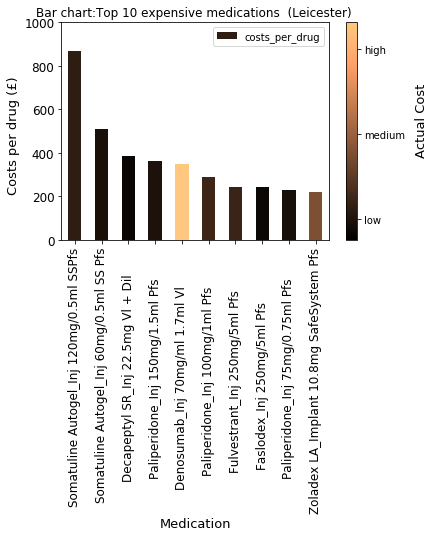

In [13]:
#compare ten most expensive medications on cost per drug and total actual cost 

%matplotlib inline

y=Leicester_top10['ACT COST']
colors = cm.copper(y / float(max(y)))

ax=Leicester_top10 [['BNF NAME','costs_per_drug']].plot(kind='bar', x='BNF NAME', y='costs_per_drug',color=colors, title='Bar chart:Top 10 expensive medications  (Leicester) ', figsize=(6,4),legend=True, fontsize=12)
ax.set_xlabel("Medication",fontsize=13)
ax.set_ylabel(u"Costs per drug (£)  ",fontsize=13)
ax.set_ylim(0,1000)

bar = plt.scatter(y, y, c = y, cmap = 'copper')
cb=plt.colorbar(bar)
cb.set_ticks([1500,6000,10500])
cb.set_ticklabels(['low','medium','high'])
cb.set_label('Actual Cost', labelpad=10, y=0.55,fontsize=13)


## A4:How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference?

In [14]:
#use postcode to select practice in Cambridge 
Cambridge_prac=UK_prac[UK_prac['address_3'].str.strip()=='CAMBRIDGE']

#connect prescription data with practice data through practice code
Cambridge_presc=UK_presc.merge(Cambridge_prac,how='inner',left_on='Practice_code', right_on='Practice_code')

# sum prescribed items and actual cost to get total prescription frequency and cost per GP
Cam_presc_GP=Cambridge_presc.groupby(['Practice_code','Practice_name']).agg({'ITEMS':'sum','ACT COST':'sum'})
Cam_presc_GP.rename(columns={'ITEMS': 'prescription frequency','ACT COST':'total cost'}, inplace=True)
Cam_presc_GP

,,prescription frequency,total cost
Practice_code,Practice_name,,
D81001,LENSFIELD MEDICAL PRACTICE,8233,74230.82
D81002,HUNTINGDON ROAD SURGERY,16532,121673.12
D81003,YORK STREET MEDICAL PRACTICE,12858,101834.83
D81005,NEWNHAM WALK SURGERY,6450,70439.91
D81009,SHELFORD MEDICAL PRACTICE,10787,85895.67
D81012,CORNFORD HOUSE SURGERY,15425,114679.72
D81013,TRUMPINGTON STREET MEDICAL PRACTICE,8916,84428.42
D81016,ARBURY ROAD SURGERY,15211,113547.90
D81017,MILL ROAD SURGERY,7556,47494.93


In [15]:
#compare Leicester with Cambridge on prescription frequency and actual cost
print 'The prescribing frequency of cambridge is',Cam_presc_GP['prescription frequency'].sum() , 'and the frequency of Leicester is',Lei_presc_GP['prescription frequency'].sum()
print 'Leicester had',round(float(Leicester_presc['ITEMS'].sum())/Cambridge_presc['ITEMS'].sum(),2), 'times more prescription than Cambridge'
print 'The prescribing cost of cambridge is', Cambridge_presc['ACT COST'].sum() , 'and the cost of Leicester is', Leicester_presc['ACT COST'].sum()
print 'Leicester spent', round(Leicester_presc['ACT COST'].sum()/Cambridge_presc['ACT COST'].sum(),2), 'times more money than Cambridge'

The prescribing frequency of cambridge is 345193 and the frequency of Leicester is 678589
Leicester had 1.97 times more prescription than Cambridge
The prescribing cost of cambridge is 2607317.49 and the cost of Leicester is 4919188.88
Leicester spent 1.89 times more money than Cambridge


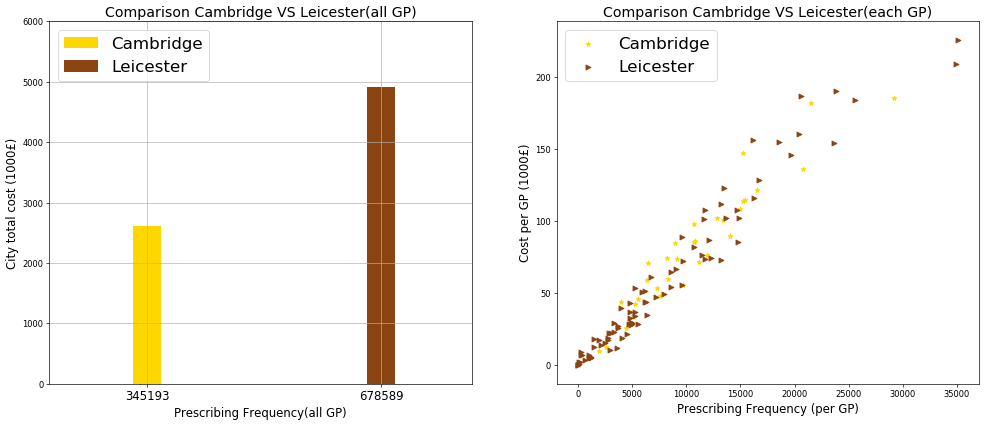

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20, 8),dpi=60)
x=[Cambridge_presc['ITEMS'].sum(),Leicester_presc['ITEMS'].sum()]
y=[Cambridge_presc['ACT COST'].sum()/1000,Leicester_presc['ACT COST'].sum()/1000]

plt.subplot(1, 2, 1)
patches=plt.bar(x,y,width=40000,color=["gold","saddlebrown"])
plt.xlim(205193,808589)
plt.ylim(0,6000)
plt.xticks(x,[Cambridge_presc['ITEMS'].sum(), Leicester_presc['ITEMS'].sum()],fontsize=14)
plt.ylabel(u"City total cost (1000£)",fontsize=14)
plt.xlabel("Prescribing Frequency(all GP)",fontsize=14)
plt.title('Comparison Cambridge VS Leicester(all GP)',fontsize=17)
lable=['Cambridge', 'Leicester']
plt.legend(patches,lable,loc="upper left",prop={'size': 20})
plt.grid() 

plt.subplot(1, 2, 2)
plt.title('Comparison Cambridge VS Leicester(each GP)',fontsize=17)
plt.scatter(Cam_presc_GP['prescription frequency'],Cam_presc_GP['total cost']/1000,c='gold',marker='*')
plt.scatter(Lei_presc_GP['prescription frequency'],Lei_presc_GP['total cost']/1000,c='saddlebrown',marker='>')
plt.ylabel(u"Cost per GP (1000£)",fontsize=14)
plt.xlabel("Prescribing Frequency (per GP)",fontsize=14)
lable=['Cambridge', 'Leicester']
plt.legend(lable,loc="upper left",prop={'size': 20})

## A5:Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order 

In [17]:
# calculate the number of GP in Leicester
UK_prac2=UK_prac.drop(UK_prac.columns[-1],axis=1)  #remoce last column that contained nothing

In [18]:
query="SELECT address_3,count(*) FROM UK_prac2 WHERE address_3 = 'LEICESTER                '  "
print (pdsql(query, locals()))

                   address_3  count(*)
0  LEICESTER                        84


In [19]:
# calculate the number of GP 
UK_prac=UK_prac.drop(UK_prac.columns[-1],axis=1)
query="SELECT address_3,count(*) FROM UK_prac2 GROUP BY UK_prac2.address_3 ORDER BY count(*) DESC  "
print (pdsql(query, locals()))

                      address_3  count(*)
0                                     339
1     BIRMINGHAM                      173
2     LIVERPOOL                       137
3     LEEDS                           122
4     MANCHESTER                      117
5     SHEFFIELD                       105
6     BRISTOL                          95
7     COVENTRY                         95
8     LONDON                           92
9     BRADFORD                         85
10    LEICESTER                        84
11    NOTTINGHAM                       78
12    PLYMOUTH                         56
13    WOLVERHAMPTON                    56
14    NEWCASTLE UPON TYNE              54
15    PRESTON                          49
16    STOKE ON TRENT                   49
17    SUNDERLAND                       47
18    WALSALL                          46
19    DONCASTER                        45
20    SOUTHAMPTON                      44
21    BRIGHTON                         43
22    HUDDERSFIELD                

# Assignment B  (entire dataset)

## B1:Calculate the monthly total spending for each GP-practice.

In [20]:
#count the number of prescription and monthly total spending in each GP
GP_cost=UK_presc.groupby(['Practice_code'])['ACT COST'].agg({'cost_per_practice':'sum'}).reset_index()
GP_cost

,Practice_code,cost_per_practice
0,A81001,83220.57
1,A81002,333514.67
2,A81003,47977.16
3,A81004,147494.85
4,A81005,107669.51
5,A81006,197436.78
6,A81007,141780.85
7,A81008,62463.90
8,A81009,139612.91
9,A81011,188196.12


## B2:Use the number of registered patients in each GP-practice to calculate the relative costs per patient. 

In [21]:
#patient in each GP from 01.10-31.12 
url='https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age'
patient_num=pd.read_csv(url).rename(columns=lambda x: x.strip())

In [22]:
#generate a data frame that include patient number and total cost of each GP in nation
GP_cost_with_patient_num = pd.merge(GP_cost, patient_num[['GP_PRACTICE_CODE', 'Total_All']], left_on='Practice_code' , right_on='GP_PRACTICE_CODE')

#calculate cost per patient : divide total cost by patient number
GP_cost_with_patient_num['cost_per_patient']=GP_cost_with_patient_num['cost_per_practice']/GP_cost_with_patient_num['Total_All']

#drop duplicate column introduced by merging
GP_cost_with_patient_num=GP_cost_with_patient_num.drop('GP_PRACTICE_CODE',axis=1)

#change column name
GP_cost_with_patient_num.rename(columns={'Total_All': 'patient_num'}, inplace=True)
GP_cost_with_patient_num

,Practice_code,cost_per_practice,patient_num,cost_per_patient
0,A81001,83220.57,4234,19.655307
1,A81002,333514.67,19691,16.937417
2,A81003,47977.16,3357,14.291677
3,A81004,147494.85,9151,16.117894
4,A81005,107669.51,7883,13.658443
5,A81006,197436.78,12345,15.993259
6,A81007,141780.85,9744,14.550580
7,A81008,62463.90,4027,15.511274
8,A81009,139612.91,9175,15.216666
9,A81011,188196.12,11435,16.457903


## B3.Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for your city within the national scatterplot 

### find outliers in data after plotting

Text(0,59000,u'y=0.061408x+(1479.703823)')

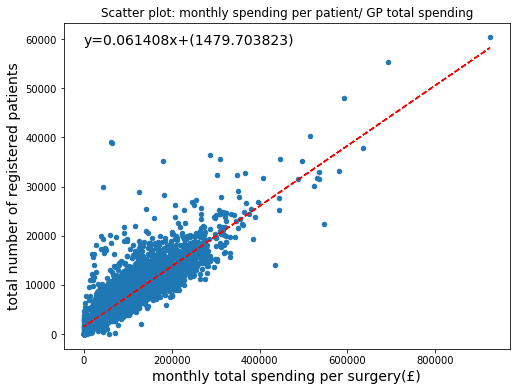

In [23]:
#plot GP cost on monthly total spending per patient
ax=GP_cost_with_patient_num.plot(kind='scatter', x='cost_per_practice', y='patient_num', title='Scatter plot: monthly spending per patient/ GP total spending', figsize=(8,6))
ax.set_xlabel(u"monthly total spending per surgery(£)",fontsize=14)
ax.set_ylabel("total number of registered patients",fontsize=14)
x=GP_cost_with_patient_num['cost_per_practice']
y=GP_cost_with_patient_num['patient_num']
f= np.polyfit(x, y, 1)
p = np.poly1d(f)
plt.plot(x,p(x),"r--")
plt.text(0,59000,"y=%.6fx+(%.6f)"%(f[0],f[1]),fontsize=14)

### generate range to not show outliers

In [24]:
from math import floor

z=GP_cost_with_patient_num['cost_per_patient']
min_x = floor(GP_cost_with_patient_num['cost_per_practice'].quantile(.01))
max_x = floor(GP_cost_with_patient_num['cost_per_practice'].quantile(.99))
min_y = floor(GP_cost_with_patient_num['patient_num'].quantile(.01))
max_y = floor(GP_cost_with_patient_num['patient_num'].quantile(.99))
min_z = floor(GP_cost_with_patient_num['cost_per_patient'].quantile(.01))
max_z = floor(GP_cost_with_patient_num['cost_per_patient'].quantile(.99))

### calculate personal spending in Leicester

In [25]:
#generate a data frame that include patient number and total cost of each GP in Leicester
Lei_cost_with_patient_num=GP_cost_with_patient_num.merge(Leicester_prac,how='inner',left_on='Practice_code', right_on='Practice_code')

#calculate cost per patient : divide total cost by patient number
Lei_cost_with_patient_num=Lei_cost_with_patient_num[['Practice_code','cost_per_patient','cost_per_practice','patient_num']]


### final plot: visualize Leicester in nation with trend line

Text(0.5,1,u'Scatter plot: monthly spending per patient/ GP total spending')

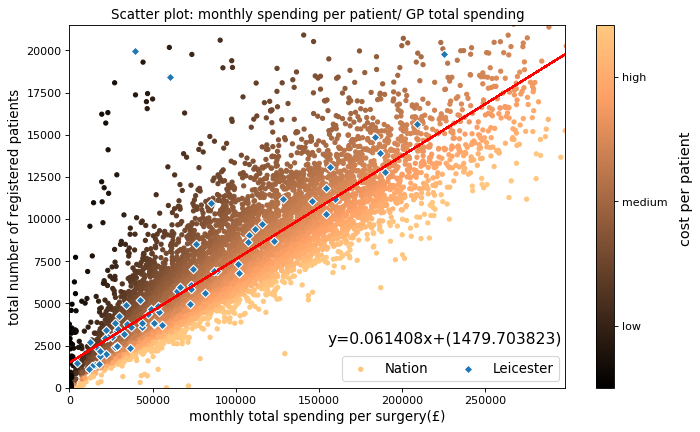

In [26]:
from matplotlib import cm
fig,ax=plt.subplots(dpi=80,figsize=(10, 6))

colors = cm.copper(z/20)
nation=ax.scatter(x, y, color=colors,s=14)
lei=ax.scatter(Lei_cost_with_patient_num['cost_per_practice'],Lei_cost_with_patient_num['patient_num'],s=30, marker='D',edgecolors='white')

#trend line for nation
f = np.polyfit(x, y, 1)
p = np.poly1d(f)
plt.plot(x,p(x),"r--")
plt.text(155000,2600,"y=%.6fx+(%.6f)"%(f[0],f[1]),fontsize=14)

# color bar
bar = plt.scatter(z, z, c = z, cmap = 'copper')
cb=plt.colorbar(bar)
cb.set_ticks([10000,30000,50000])
cb.set_ticklabels(['low','medium','high'])
cb.set_label('cost per patient', labelpad=10, y=0.55,fontsize=13)

ax.legend((nation,lei),('Nation','Leicester'),scatterpoints=1,
           loc='best',
           ncol=3,
           fontsize=12)
ax.set_xlabel(u"monthly total spending per surgery(£)",fontsize=12)
ax.set_ylabel("total number of registered patients",fontsize=12)
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)
ax.set_title('Scatter plot: monthly spending per patient/ GP total spending')


## B4:Visualize the relative costs per patient of all national GP-practices in a histogram

(3.0, 23.0)

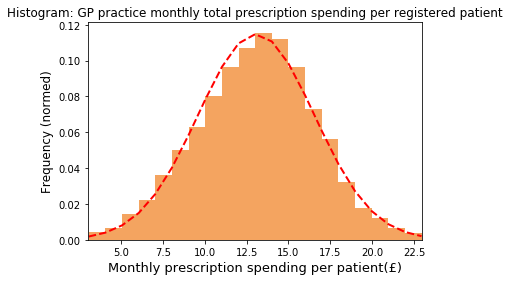

In [27]:
#use histogram to show relative costs per patient of all national GP-practices
from scipy.stats import norm
import matplotlib.mlab as mlab

#do not show outliers
z_drop=z[z<=max_z][z>=min_z]

# best fit of data
(mu, sigma) = norm.fit(z_drop)
n, bins, patches =plt.hist(z_drop,bins=20, normed=1,color='sandybrown')
f = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, f, 'r--', linewidth=2)

plt.title('Histogram: GP practice monthly total prescription spending per registered patient',fontsize=12)
plt.ylabel('Frequency (normed)',fontsize=12)
plt.xlabel(u'Monthly prescription spending per patient(£)',fontsize=13)

plt.xlim(min_z,max_z)

## B5:Use descriptive statistics to show how your assigned city compares to the national level.

In [28]:
print 'Natioanal Level'
print GP_cost_with_patient_num.describe()

print 'Leicester'
print Lei_cost_with_patient_num.describe()


Natioanal Level
       cost_per_practice   patient_num  cost_per_patient
count        7701.000000   7701.000000       7701.000000
mean        97573.645499   7471.459031         21.317316
std         65787.154710   4607.808820        665.570655
min             2.410000      1.000000          0.001872
25%         47714.240000   4037.000000         10.689451
50%         84448.530000   6646.000000         13.212266
75%        133552.730000  10000.000000         15.504289
max        923786.260000  60352.000000      58319.780000
Leicester
       cost_per_patient  cost_per_practice   patient_num
count         69.000000          69.000000     69.000000
mean          10.827507       70182.166522   6393.898551
std            2.997146       54396.493421   4580.190479
min            1.986421        4825.590000   1089.000000
25%            8.576370       28365.380000   3190.000000
50%           11.369911       51011.780000   4832.000000
75%           12.779256      101799.330000   8727.000000
max  

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/numpy/core/fromnumeric.py:224: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return reshape(newshape, order=order)


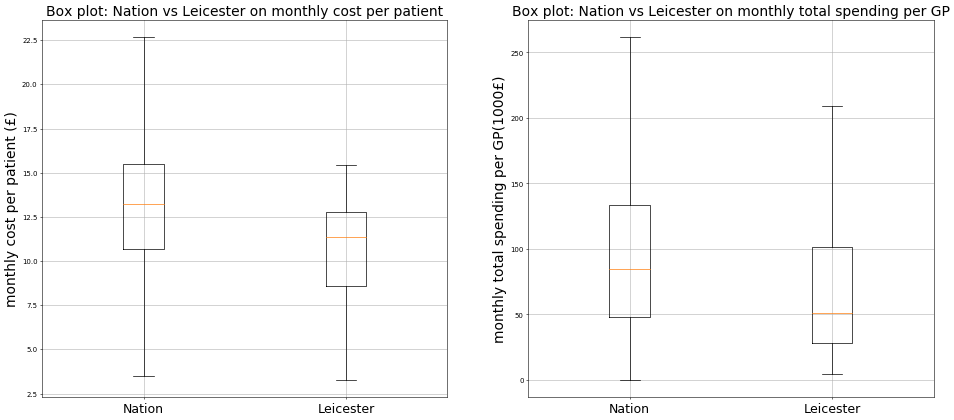

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(23, 10),dpi=50)
# generate box plot to compare on monthly cost per patient
plt.subplot(1, 2, 1)
plt.boxplot([GP_cost_with_patient_num['cost_per_patient'],Lei_cost_with_patient_num['cost_per_patient']],0,'',positions = [1,2],widths = 0.2)
plt.xticks([1,2],['Nation', 'Leicester'],fontsize=18 )
plt.ylabel(u'monthly cost per patient (£)',fontsize=20)
plt.title('Box plot: Nation vs Leicester on monthly cost per patient',fontsize=20)
plt.grid()          

# generate box plot to compare on monthly total spending per GP
plt.subplot(1, 2, 2)
plt.boxplot([GP_cost_with_patient_num['cost_per_practice'].astype(float)/1000,Lei_cost_with_patient_num['cost_per_practice'].astype(float)/1000],0,'',positions = [1,2],widths = 0.2)
plt.xticks([1,2],['Nation', 'Leicester'],fontsize=18 )
plt.ylabel(u"monthly total spending per GP(1000£)",fontsize=20)
plt.title('Box plot: Nation vs Leicester on monthly total spending per GP',fontsize=20)
plt.grid()    

# Assignment C

## C1:Identify for all GP-practices the relative costs per patient for all statin prescriptions (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015.

In [30]:
#find all prescription statin prescription in nation
statin_list=['Simvastatin', 'Atorvastatin', 'Rosuvastatin', 'Pravastatin', 'Fluvastatin']
pattern = '|'.join(statin_list)
statin=UK_presc[UK_presc['BNF NAME'].str.contains(pattern)]
statin

,SHA,PCT,Practice_code,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
102,Q44,RXA,Y00327,0212000B0AAACAC,Atorvastatin_Tab 40mg,2,1.67,1.67,29,201512,
103,Q44,RXA,Y00327,0212000Y0AAABAB,Simvastatin_Tab 20mg,1,0.10,0.20,3,201512,
647,Q44,RY7,N85638,0212000B0AAABAB,Atorvastatin_Tab 20mg,1,0.70,0.76,14,201512,
648,Q44,RY7,N85638,0212000B0AAACAC,Atorvastatin_Tab 40mg,1,0.06,0.17,1,201512,
650,Q44,RY7,N85638,0212000X0AAAAAA,Pravastatin Sod_Tab 10mg,1,0.29,0.38,7,201512,
651,Q44,RY7,N85638,0212000Y0AAADAD,Simvastatin_Tab 40mg,4,1.47,1.71,37,201512,
1166,Q44,RY7,N85645,0212000Y0AAADAD,Simvastatin_Tab 40mg,1,0.28,0.37,7,201512,
2274,Q44,01C,N81002,0212000AAAAAAAA,Rosuvastatin Calc_Tab 10mg,18,504.84,467.04,784,201512,
2275,Q44,01C,N81002,0212000AAAAABAB,Rosuvastatin Calc_Tab 20mg,5,208.16,192.53,224,201512,
2276,Q44,01C,N81002,0212000AAAAADAD,Rosuvastatin Calc_Tab 5mg,9,270.45,250.20,420,201512,


In [31]:
#calculate total cost on stastin in each GP 
GP_statin=statin.groupby(['Practice_code'])['ACT COST'].agg({'statin_cost':'sum'}).reset_index()

#connect cost per GP with patient number
GP_statin_with_patient_num = pd.merge(GP_statin, patient_num[['GP_PRACTICE_CODE', 'Total_All']] ,left_on='Practice_code' , right_on='GP_PRACTICE_CODE')

#calculate avarege cost on stastin per patient per GP
GP_statin_with_patient_num['relative costs per patient']=pd.Series(GP_statin_with_patient_num['statin_cost']/GP_statin_with_patient_num['Total_All'],index=GP_statin_with_patient_num.index)
pd.DataFrame(GP_statin_with_patient_num[['Practice_code','Total_All','statin_cost','relative costs per patient']])

,Practice_code,Total_All,statin_cost,relative costs per patient
0,A81001,4234,1816.80,0.429098
1,A81002,19691,6513.51,0.330786
2,A81003,3357,868.39,0.258680
3,A81004,9151,2134.60,0.233264
4,A81005,7883,1887.11,0.239390
5,A81006,12345,4074.99,0.330092
6,A81007,9744,2245.57,0.230457
7,A81008,4027,1398.07,0.347174
8,A81009,9175,1588.11,0.173091
9,A81011,11435,2945.80,0.257613


## C2.Identify for all GP-practice the associated Index of Multiple Deprivation (IMD) for each GP-Practice in your assigned city.

In [32]:
##read csv file of all IMD in UK
IMD=pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv')
IMD=IMD.drop_duplicates(subset=None, keep='first', inplace=False)

#create df about IMD in Leicester
Leicester_IMD=pd.merge(IMD,Leicester_prac[['post_code','Practice_code','Practice_name']],left_on='Postcode',right_on='post_code')
pd.DataFrame(Leicester_IMD[['Practice_code','post_code','Practice_name','Index of Multiple Deprivation Rank']])

,Practice_code,post_code,Practice_name,Index of Multiple Deprivation Rank
0,C82005,LE3 9ED,GROBY ROAD MEDICAL CENTRE (ID PATCHETT),5122.0
1,C82015,LE4 7ZX,RUSHEY MEAD HEALTH CENTRE,5700.0
2,C82680,LE4 7ZX,THE PRACTICE-RUSHEY MEAD,5700.0
3,C82018,LE4 0JF,PARKER DRIVE SURGERY,13685.0
4,C82100,LE2 9BU,THE HEDGES MEDICAL CENTRE (SA BAILEY),1354.0
5,C82626,LE2 9BU,PASLEY ROAD HEALTH CENTRE (TK KHONG),1354.0
6,C82020,LE2 7HX,DE MONTFORT SURGERY,10054.0
7,C82021,LE2 5AA,THE CENTRAL SURGERY,19586.0
8,C82022,LE7 9AJ,THE BILLESDON SURGERY,25256.0
9,C82023,LE1 2NZ,ST MATTHEWS HEALTH & COMMUNITY CENTRE,1989.0


## C3.Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile. Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD). Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.




In [33]:
#cut the cost on statin into deciles according to relative cost on statins
GP_statin_with_patient_num['decile']=pd.qcut(GP_statin_with_patient_num['relative costs per patient'].values,10)

#the first decile has the lowest relative cost on statin
lowest=GP_statin_with_patient_num[GP_statin_with_patient_num['decile']==GP_statin_with_patient_num['decile'].min()]
lowest=lowest.reset_index()

# connect statin record with IMD record, through practice code and postcode
lowest_with_postcode=UK_prac.merge(lowest,how='inner',left_on='Practice_code',right_on='Practice_code')
lowest_with_postcode['post_code']=lowest_with_postcode['post_code'].str.strip()
IMD['Postcode']=IMD['Postcode'].str.strip()
lowest_IMD=lowest_with_postcode.merge(IMD,how='inner',left_on='post_code',right_on='Postcode')
pd.DataFrame(lowest_IMD[['Practice_code','Practice_name','Index of Multiple Deprivation Rank','relative costs per patient','decile']])

,Practice_code,Practice_name,Index of Multiple Deprivation Rank,relative costs per patient,decile
0,A81621,THORNTREE SURGERY,376.0,0.079278,"[0.00042, 0.122]"
1,A82045,WIGTON GROUP MEDICAL PRACTICE,11050.0,0.105072,"[0.00042, 0.122]"
2,A82613,WRAYSDALE HOUSE SURGERY,17679.0,0.060310,"[0.00042, 0.122]"
3,A82623,SOLWAY HEALTH SERVICES,3099.0,0.110108,"[0.00042, 0.122]"
4,A83011,CLAYPATH & UNIVERSITY MEDICAL GROUP,23986.0,0.112566,"[0.00042, 0.122]"
5,A83068,JUPITER HOUSE SURGERY,6877.0,0.005427,"[0.00042, 0.122]"
6,A84025,CRAMLINGTON MEDICAL GROUP,15790.0,0.009050,"[0.00042, 0.122]"
7,A86003,SAVILLE MEDICAL GROUP,16382.0,0.122247,"[0.00042, 0.122]"
8,A86007,AVENUE MEDICAL PRACTICE,27274.0,0.116408,"[0.00042, 0.122]"
9,A86027,NEWCASTLE MEDICAL CENTRE,16382.0,0.014279,"[0.00042, 0.122]"


In [34]:
#the last decile has the lowest relative cost on statin
highest= GP_statin_with_patient_num[GP_statin_with_patient_num['decile']==GP_statin_with_patient_num['decile'].max()]
highest=highest.reset_index()

# connect statin record with IMD record, through practice code and postcode
highest_with_postcode=UK_prac.merge(highest,how='inner',left_on='Practice_code',right_on='Practice_code')
highest_with_postcode['post_code']=highest_with_postcode['post_code'].str.strip()
IMD['Postcode']=IMD['Postcode'].str.strip()
highest_IMD=highest_with_postcode.merge(IMD,how='inner',left_on='post_code',right_on='Postcode')
pd.DataFrame(highest_IMD[['Practice_code','Practice_name','Index of Multiple Deprivation Rank','relative costs per patient','decile']])

,Practice_code,Practice_name,Index of Multiple Deprivation Rank,relative costs per patient,decile
0,A81001,THE DENSHAM SURGERY,73.0,0.429098,"(0.341, 995.74]"
1,A81025,THE DOVECOT SURGERY,73.0,0.447737,"(0.341, 995.74]"
2,A81008,ALBERT HOUSE CLINIC,664.0,0.347174,"(0.341, 995.74]"
3,A81014,QUEENSTREE PRACTICE,6011.0,0.351968,"(0.341, 995.74]"
4,A81066,PARK LANE SURGERY,15355.0,0.382768,"(0.341, 995.74]"
5,A81608,ELM TREE SURGERY,788.0,0.375418,"(0.341, 995.74]"
6,A82040,CATHERINE STREET SURGERY,1158.0,0.357627,"(0.341, 995.74]"
7,A82065,PENINSULA MEDICAL PRACTICE,20422.0,0.512334,"(0.341, 995.74]"
8,A83007,BLACKHALL AND PETERLEE PRACTICE,1558.0,0.356458,"(0.341, 995.74]"
9,A83009,BRIDGE END SURGERY,23730.0,0.382094,"(0.341, 995.74]"


In [35]:
#description statistics of two groups
print 'Lowest Decile' 
print lowest_IMD['Index of Multiple Deprivation Rank'].describe()
print 'Highest Decile' 
print highest_IMD['Index of Multiple Deprivation Rank'].describe()

Lowest Decile
count      768.000000
mean     12266.489583
std       8901.065786
min         27.000000
25%       5026.000000
50%       9925.000000
75%      18880.000000
max      32837.000000
Name: Index of Multiple Deprivation Rank, dtype: float64
Highest Decile
count      768.000000
mean     13805.903646
std       9185.248403
min         43.000000
25%       5458.500000
50%      12928.000000
75%      21521.500000
max      32639.000000
Name: Index of Multiple Deprivation Rank, dtype: float64


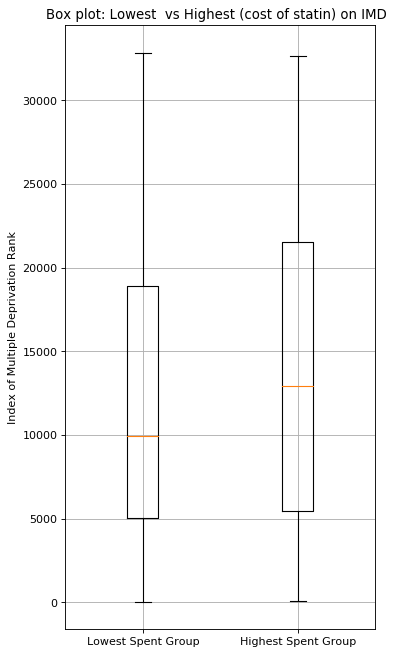

In [36]:
#use box plot to compare IMD rank in two group(the lowest and highest relatice cost group)
plt.figure(num=1, figsize=(5, 10), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot([lowest_IMD['Index of Multiple Deprivation Rank'].dropna(),highest_IMD['Index of Multiple Deprivation Rank']],positions = [1,2],widths = 0.2)
plt.xticks([1,2],['Lowest Spent Group', 'Highest Spent Group'] )
plt.ylabel('Index of Multiple Deprivation Rank')
plt.title('Box plot: Lowest  vs Highest (cost of statin) on IMD  ')
plt.grid()  

#### Discussion: higher statin cost may have association with higher IMD score.

##  C4.Identify for all GP-practices the associated nine English regions. Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

In [37]:
#read postcode files
postcodes=pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/postcodes.csv',usecols=['Postcode 1','Country Name','Region Name'])

In [38]:
#delete NaN in Region Name
English_post = postcodes[pd.notnull(postcodes['Region Name'])]

#add region name to the practices
English_post['Postcode']=English_post['Postcode 1'].str.strip()
UK_prac['post_code']=UK_prac['post_code'].str.strip()
Eng_prac=English_post.merge(UK_prac,how='inner',left_on='Postcode',right_on='post_code')

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
#read mortality data
Mortality=pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv')
Mortality_2015=Mortality[Mortality['Year']==2015] 
Mortality_2015=Mortality_2015[Mortality['Breakdown']=='Region']

/home/nbuser/anaconda2_501/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [40]:
#define a function that could convert number from str type to float type
def str_float(i):
    i=i.replace(',','')
    return float(i)

#apply the function on series that need change type
Mortality_2015['Numerator']=Mortality_2015['Numerator'].apply(str_float)
Mortality_2015['Denominator']=Mortality_2015['Denominator'].apply(str_float)

#calculate mortality rate (divide)
Mortality_2015['rate(per 10000)']=Mortality_2015['Numerator']/Mortality_2015['Denominator']*10000

#ignore gender
Mortality_2015=Mortality_2015[Mortality_2015['Gender']=='Person']
print Mortality_2015[['Level description','rate(per 10000)']]


            Level description  rate(per 10000)
471             East Midlands         7.392470
472           East of England         6.324888
473                    London         4.917953
474                North East         8.336807
475                North West         8.213337
476                South East         5.713482
477                South West         6.719760
478             West Midlands         7.166692
479  Yorkshire and The Humber         7.621914


## C5.Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis]. Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate from cardiovascular diseases.

In [41]:
#create a df that contain info about total cost on statin and mortality rate of each region
Region=pd.DataFrame()
GP_statin=GP_statin.reset_index()

In [42]:
#select statin data in England throgh merge on England practice
Eng_statin=Eng_prac.merge(GP_statin,how='inner',left_on='Practice_code',right_on='Practice_code')
Region['statin']=Eng_statin.groupby('Region Name')['statin_cost'].sum()

#combine rate with statin cost
Region=pd.merge(Region,Mortality_2015,left_index = True, right_on='Level description')
Region=Region.sort_values(by='statin')
pd.DataFrame(Region[['Level description','statin','rate(per 10000)']])

,Level description,statin,rate(per 10000)
474,North East,335891.22,8.336807
471,East Midlands,498393.26,7.392470
477,South West,586518.01,6.719760
472,East of England,654867.43,6.324888
476,South East,666886.53,5.713482
479,Yorkshire and The Humber,740312.29,7.621914
478,West Midlands,1006784.65,7.166692
473,London,1009950.80,4.917953
475,North West,1360460.52,8.213337


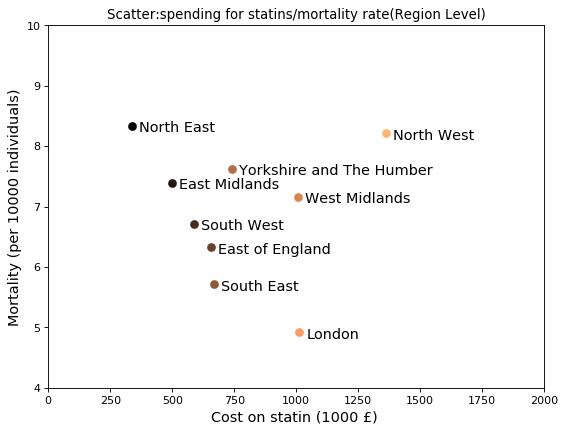

In [43]:
#use scatter plot to show the relation between mortality and statin cost
import matplotlib.cm as cm
import matplotlib.colors as colors
plt.figure(num=1, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

colormap = cm.copper
colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0, 0.9, len(Region.index))]

for i,c in enumerate(colorlist):
    x = Region['statin'].tolist()[i]/1000
    y = Region['rate(per 10000)'].tolist()[i]
    l = Region['Level description'].tolist()[i]
    plt.scatter(x, y, label=l, s=60, linewidth=0.1, c=c)
    plt.annotate(l,xy=(x,y),xytext=(x+30, y-0.1),fontsize=13)    

plt.title('Scatter:spending for statins/mortality rate(Region Level)')
plt.ylabel("Mortality (per 10000 individuals)",fontsize=13)
plt.xlabel(u"Cost on statin (1000 £) ",fontsize=13)
plt.ylim(4, 10)
plt.xlim(0,2000)
plt.show()

# Section D

## Q1.Provide a visualisation of the seasonal patterns across all years.

In [44]:
#import flu files
ArgentinaFlu=pd.read_csv('https://www.google.org/flutrends/about/data/flu/ar/data.txt',sep=',',header=8)
ArgentinaFlu['Date'] = pd.to_datetime(ArgentinaFlu['Date'])
NorwayFlu=pd.read_csv('https://www.google.org/flutrends/about/data/flu/no/data.txt',sep=',',header=8)
NorwayFlu['Date'] = pd.to_datetime(NorwayFlu['Date'])

Text(0.5,1,u'Flu trend in Argentina and Norway')

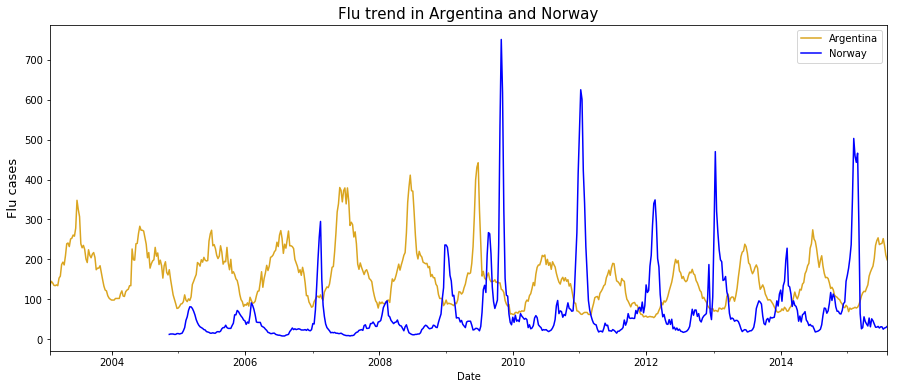

In [45]:
#Plot and store the flu trens for Argentina
ax = ArgentinaFlu.plot(legend ='left', x='Date', y = 'Argentina', figsize=(15, 6), grid=True,c='goldenrod')

#Plot the flu trend for Australia; ax=ax plots the chart into the previous
NorwayFlu.plot(x='Date', y = 'Norway' , ax=ax,c='blue')
ax.set_ylabel('Flu cases',fontsize =13)
ax.set_title('Flu trend in Argentina and Norway',fontsize=15)

## Q2.Calculate the yearly minimum and maximum for each country. Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country.

In [46]:
#extract year from date
def Year(time):
    i=time.year
    return i

NorwayFlu['year']=NorwayFlu['Date'].apply(Year)
ArgentinaFlu['year']=ArgentinaFlu['Date'].apply(Year)

In [47]:
#find the yearly max and min 
Norway_yearly=NorwayFlu.groupby(['year'])['Norway'].agg(['max','min'])
Argentina_yearly=ArgentinaFlu.groupby(['year'])['Argentina'].agg(['max','min'])

yearly=pd.DataFrame()
yearly['Norway max']=Norway_yearly['max']
yearly['Argentina max']=Argentina_yearly['max']
yearly['Norway min']=Norway_yearly['min']
yearly['Argentina min']=Argentina_yearly['min']
yearly

,Norway max,Argentina max,Norway min,Argentina min
year,,,,
2004,14,283,12,77
2005,81,273,13,78
2006,91,272,8,80
2007,295,380,8,78
2008,236,411,11,84
2009,751,442,21,63
2010,416,211,19,62
2011,625,190,15,56
2012,349,200,17,54


(0, 12)

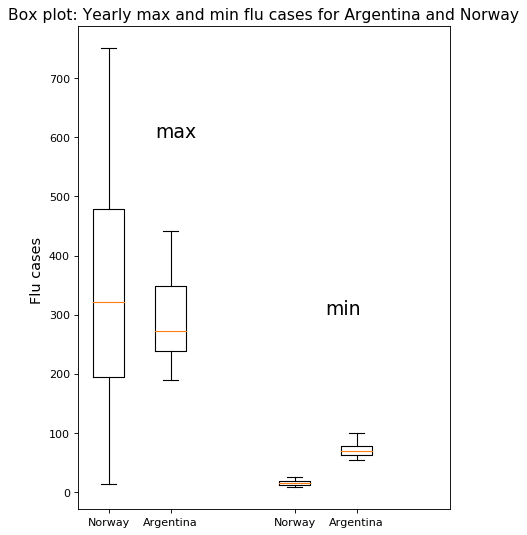

In [48]:
#compare yearly max and min in Norway and Argentina
plt.figure(num=1, figsize=(6, 8), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot([Norway_yearly['max'],Argentina_yearly['max']],positions = [1,3],widths = 1)
plt.boxplot([Norway_yearly['min'],Argentina_yearly['min']],positions = [7,9],widths = 1)
plt.text(2.5,600,'max',fontsize=17)
plt.text(8,300,'min',fontsize=17)
plt.ylabel("Flu cases ",fontsize=13)
plt.xticks([1,3,7,9],['Norway','Argentina','Norway','Argentina'],fontsize=10)
plt.title('Box plot: Yearly max and min flu cases for Argentina and Norway', fontsize=14)
plt.xlim(0,12)

### calculate yearly average flu cases on month, then fit a polynominal fiunction to predict flu cases based on month

In [49]:
#extract month from date
def Month(time):
    i=time.month
    return i

#avarage flu on each month across all the years
ArgentinaFlu['month']=ArgentinaFlu['Date'].apply(Month)
ArgentinaFlu['mean']=ArgentinaFlu.groupby(['month'])['Argentina'].mean()
ar_mean=[]
ar_mean=ArgentinaFlu.groupby(['month'])['Argentina'].mean().dropna()

NorwayFlu['month']=NorwayFlu['Date'].apply(Month)
NorwayFlu['mean']=NorwayFlu.groupby(['month'])['Norway'].mean()
no_mean=[]
no_mean=NorwayFlu.groupby(['month'])['Norway'].mean().dropna()

month=range(1,13)

In [50]:
# define a function to show mathematical function for trend

def function_style(poly, var="x", width=2):
    l = ["{0:0.{width}f}"]
    l.append(l[-1] + " {variable}")
    l.append(l[-1] + "^{1}")

    def form():
        for i, v in enumerate(reversed(poly)):
            idx = i if i < 2 else 2
            yield l[idx].format(v, i, variable=var, width=width)

    return "y=${}$".format("+".join(form()))

Text(2,260,u'y=$196.68+-12.89 x+-13.39 x^2+2.40 x^3+-0.11 x^4$')

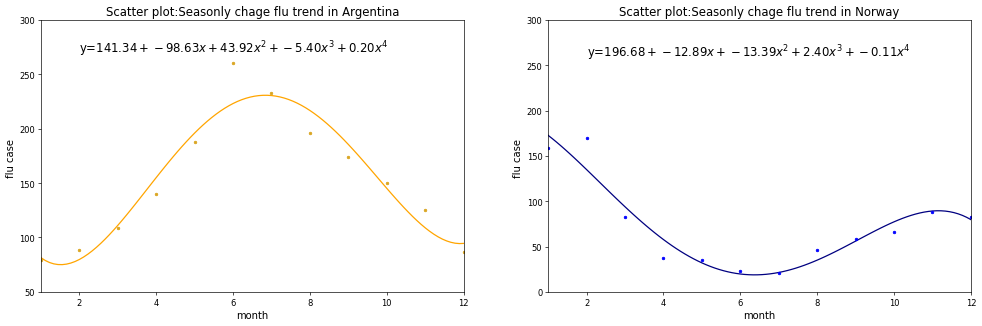

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20, 6),dpi=60)

plt.subplot(1, 2, 1)
# mathematical function of month and flu
z=np.polyfit(month,ar_mean,4)
p = np.poly1d(z)

# draw the point and the funtion
xp = np.linspace(1, 12, 100)
plt.plot(xp, p(xp), '-',color='orange')
plt.plot(month, ar_mean, '.',color='goldenrod')

plt.xlim(1,12)
plt.ylim(50,300)
plt.ylabel("flu case ",fontsize=12)
plt.xlabel("month",fontsize=12)
plt.title('Scatter plot:Seasonly chage flu trend in Argentina',fontsize=14)
plt.text(2,270,function_style(z),fontsize=14)



plt.subplot(1, 2, 2)
# mathematical function of month and flu
z2=np.polyfit(month,no_mean,4)
p2 = np.poly1d(z2)

# draw the point and the funtion
xp2 = np.linspace(1, 12, 100)
plt.plot(xp2, p2(xp2), '-',color='navy')
plt.plot(month, no_mean,'.' ,color='blue' )

plt.xlim(1,12)
plt.ylim(0,300)
plt.ylabel("flu case ",fontsize=12)
plt.xlabel("month",fontsize=12)
plt.title('Scatter plot:Seasonly chage flu trend in Norway',fontsize=14)
plt.text(2,260,function_style(z2),fontsize=14)

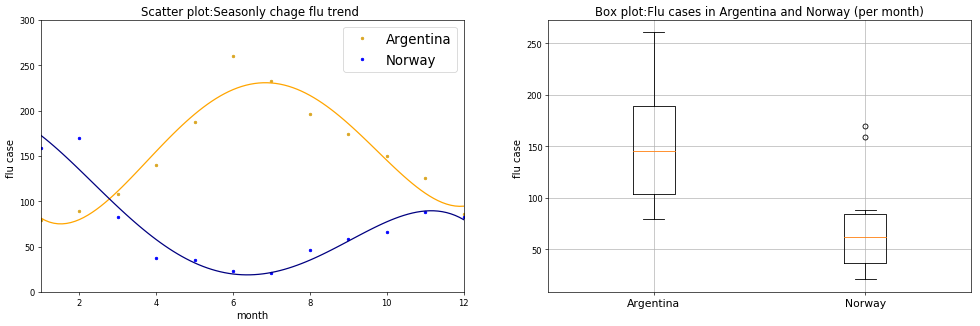

In [53]:
#show the flu trend og two countries in one picture
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20, 6),dpi=60)
plt.subplot(1, 2, 1)
plt.xlim(1,12)
plt.ylim(0,300)
plt.plot(month, ar_mean, '.',color='goldenrod')
plt.plot(xp, p(xp), '-',color='orange')
plt.plot(month, no_mean,'.' ,color='blue' )
plt.plot(xp2, p2(xp2), '-',color='navy')
plt.legend(prop={'size': 16})
plt.ylabel("flu case ",fontsize=12)
plt.xlabel("month",fontsize=12)
plt.title('Scatter plot:Seasonly chage flu trend ',fontsize=14)

#compare their flu case per month, which show the difference of two hemispheres
plt.subplot(1, 2, 2)
plt.figure(num=1, figsize=(5, 10), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot([ar_mean,no_mean],positions = [1,2],widths = 0.2)
plt.xticks([1,2],['Argentina', 'Norway'],fontsize=13 )
plt.ylabel("flu case ",fontsize=12)
plt.title('Box plot:Flu cases in Argentina and Norway (per month)',fontsize=14)
plt.grid()  